# Final Project

## Breast Cancer Detection

[Applied Machine Learning CS-3840](https://pilot.wright.edu/d2l/lms/dropbox/user/folder_submit_files.d2l?ou=624767&db=358827)

[Matthew Slusser](https://github.com/Sluss12/Applied-Machine-Learning-CS3840-01/tree/master/final-project)

---


## Data Set:
[Breast Cancer Prediction Dataset](https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset)

The dataset is obtained from: 

In [219]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from statistics import mean

#Please place breast_cancer_data.csv and your notebook/python file in the same directory; otherwise, change DATA_PATH 
DATA_PATH = ""

def load_breast_cancer_data(breast_cancer_data_path=DATA_PATH):
    csv_path = os.path.join(breast_cancer_data_path, "data.csv")
    return pd.read_csv(csv_path)

breast_cancer_data = load_breast_cancer_data()

### Display Basic Information about the dataset

In [220]:
print(breast_cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Plot the dataset across histogram

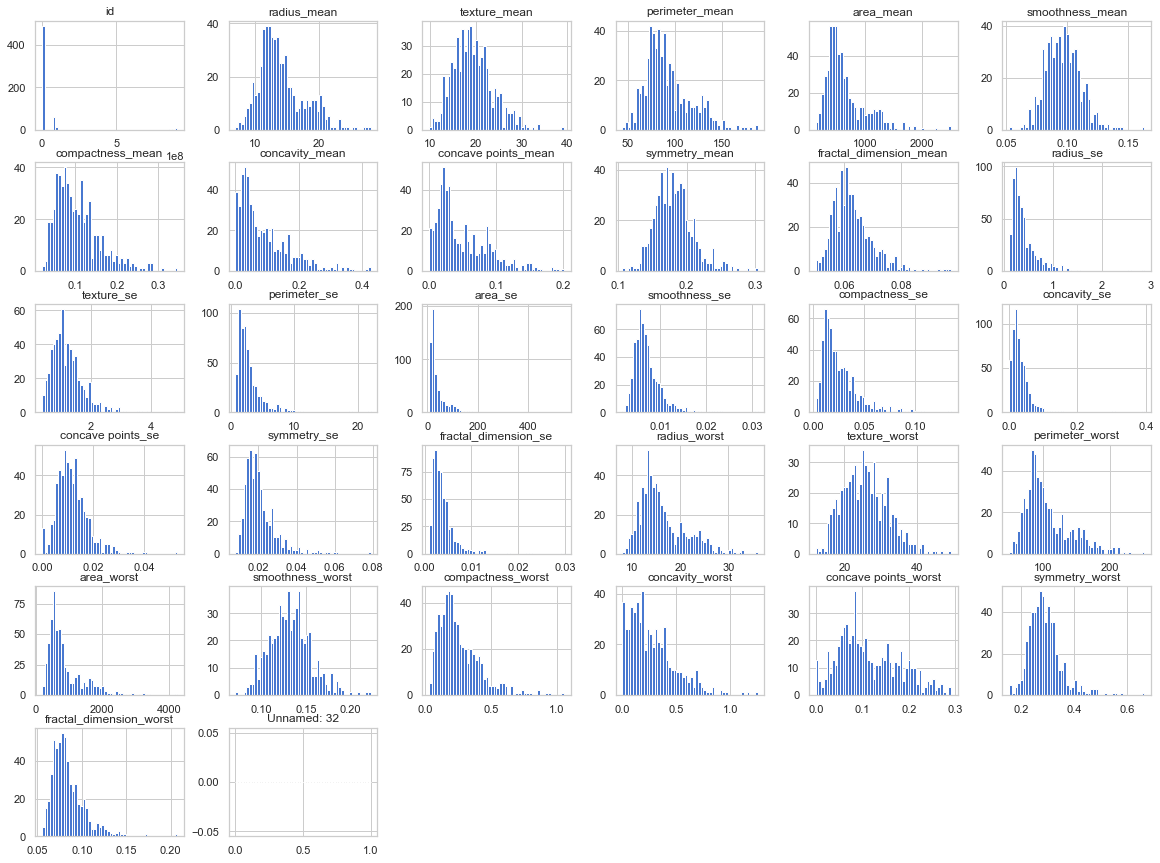

In [221]:
breast_cancer_data.hist(bins=50, figsize=(20,15))
plt.show()

In [222]:
# Show a correlation matrix of data when correlated to the `diagnosis` variable
#dropped_features = ['Unnamed: 32','id']
#corr_matrix = breast_cancer_data.drop(dropped_features, axis=1)
#corr_matrix = corr_matrix.corr()
# print(corr_matrix["diagnosis"].sort_values(ascending=False))

KeyError: 'diagnosis'

### Preprocess data and separate the data frame into features and labels

In [ ]:

#Divide the data frame into features and labels
cancer_labels = breast_cancer_data[["diagnosis"]] # use diagnosis as classification label
dropped_features = ['Unnamed: 32','id','diagnosis']
cancer_features = breast_cancer_data.drop(dropped_features, axis=1) # use columns other than diagnosis as features
print(cancer_features.describe())
print(cancer_labels["diagnosis"].value_counts())
ordinal_encoder = OrdinalEncoder()
cancer_labels_encoded = ordinal_encoder.fit_transform(cancer_labels)
y_binary = cancer_labels_encoded # maligent or beniend 

# Scale the features
std_scaler = StandardScaler()
cancer_features_scaled = std_scaler.fit_transform(cancer_features)

# Final cancer features - X
X = cancer_features_scaled # features have been scaled and now represented by X

# Create a seperate feature set to work with
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
cancer_features_1 = cancer_features.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
cancer_features_1.head()

# Data splits for binary classification
X_train, X_test, y_train, y_test = train_test_split(cancer_features_1, y_binary, test_size=0.20, random_state=42)


       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

---

### Data visualizations

#### Swarm Plots

In [ ]:
features_mean= list(cancer_features.columns[0:10])
features_se= list(cancer_features.columns[11:20])
features_worst=list(cancer_features.columns[21:30])

C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sluss\AppData\Local\Packages\PythonSo

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

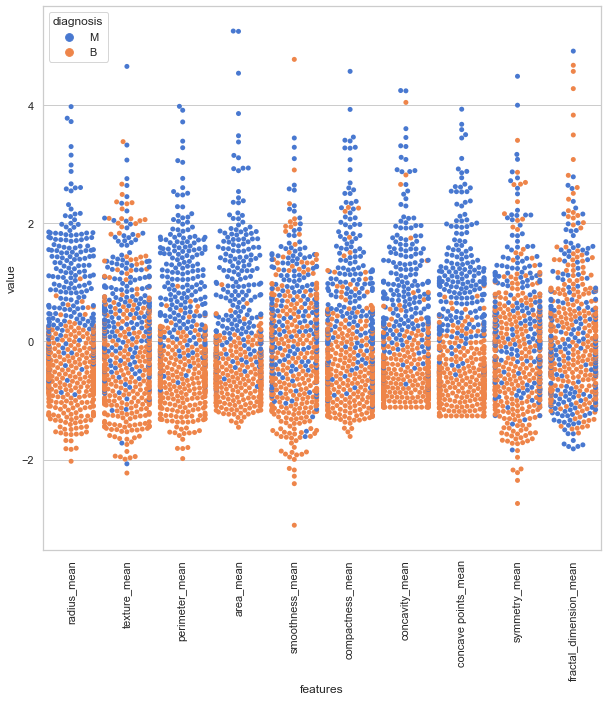

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = cancer_labels
data = cancer_features
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([cancer_labels,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value",s=5, hue="diagnosis", data=data)

plt.xticks(rotation=90)

C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sluss\AppData\Local\Packages\PythonSo

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

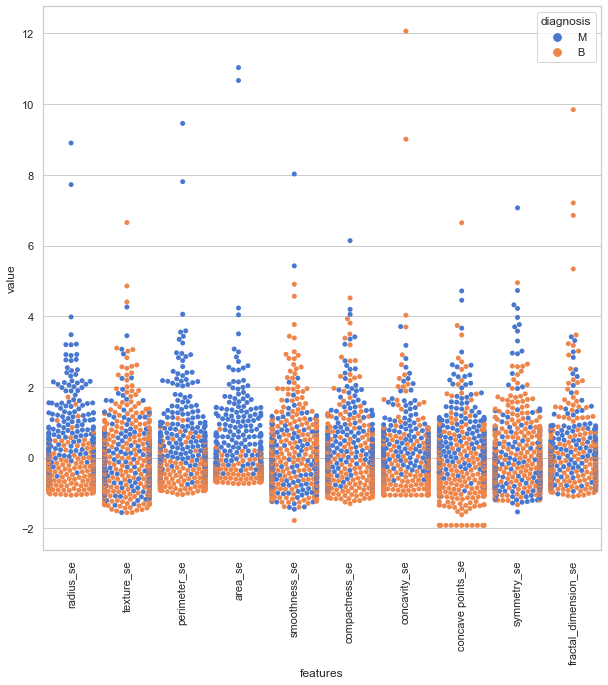

In [ ]:
data = pd.concat([cancer_labels,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", s=5, hue="diagnosis", data=data)
plt.xticks(rotation=90)

C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sluss\AppData\Local\Packages\PythonSo

swarm plot time:  11.457100868225098  s


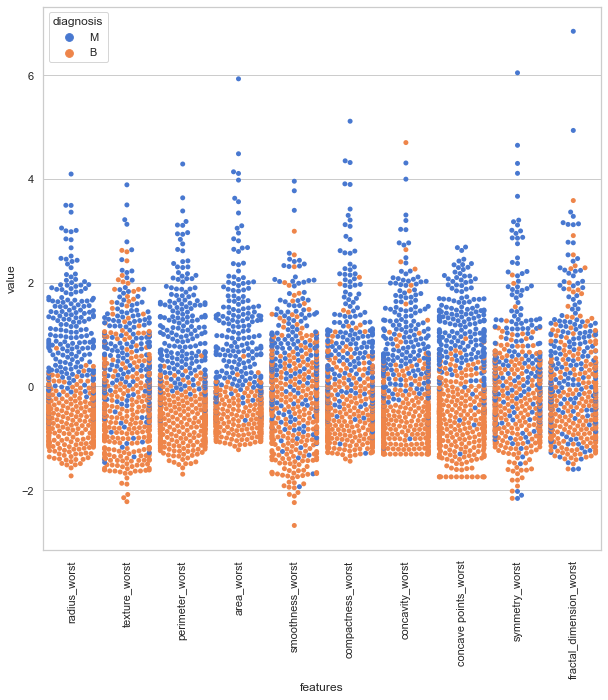

In [ ]:
data = pd.concat([cancer_labels,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", s=5, hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

#### All Features Correlation Map

<AxesSubplot:>

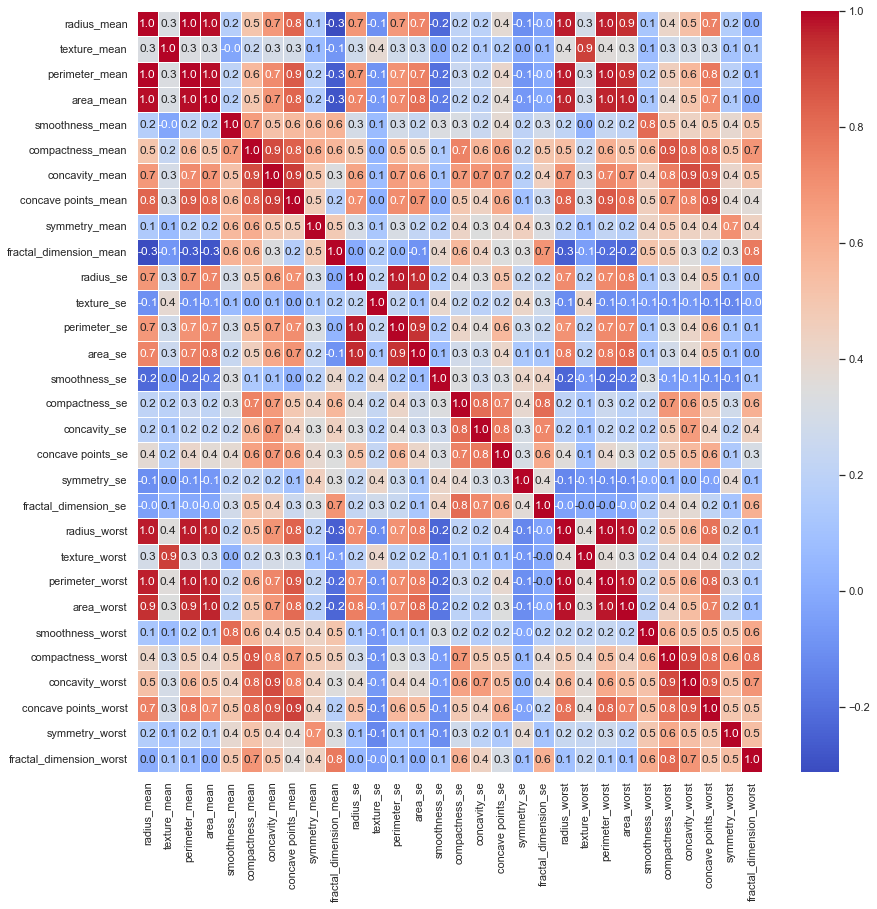

In [ ]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(cancer_features.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax, cmap= 'coolwarm')

#### All Features Correlation Map

<AxesSubplot:>

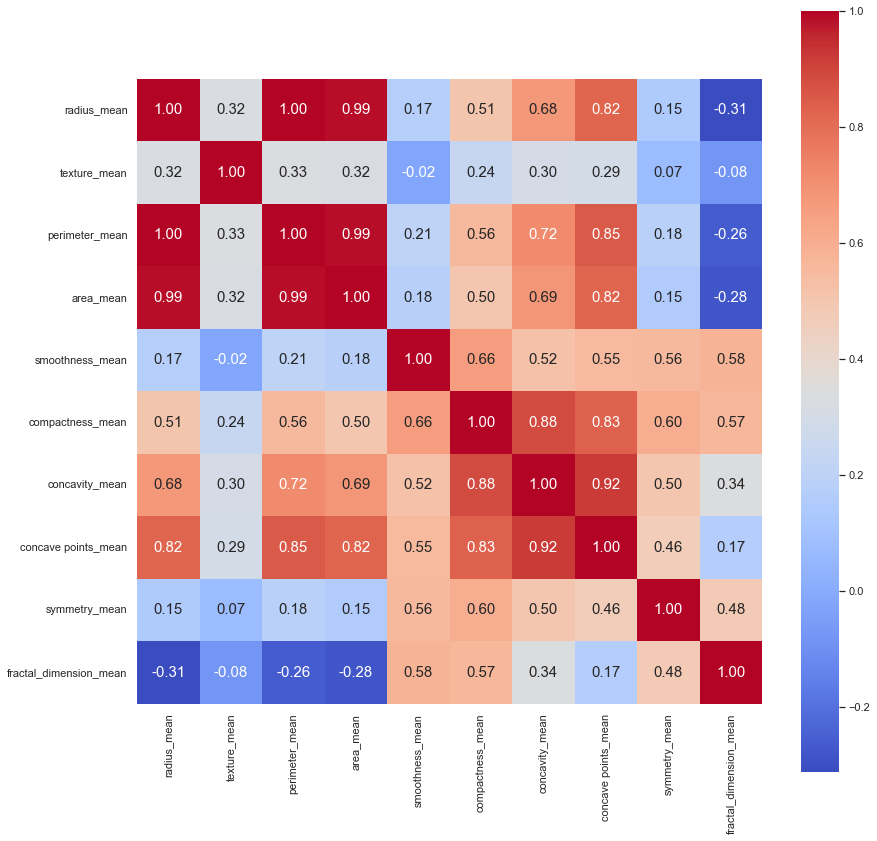

In [ ]:
corr = cancer_features[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

### Begin training various models
#### Logistic Regression

Logistic Regression Accuracy: 0.93860
Logistic Regression F1-Score: 0.91765
Logistic Regression Confusion Matrix: 


C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

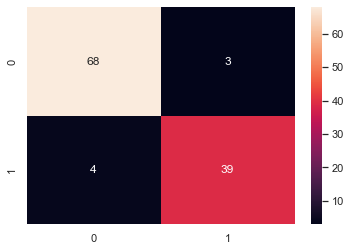

In [ ]:
# prediction variables
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
#Logictic regression binary classification on X_train and y_train
binary_reg = LogisticRegression(solver="newton-cg", random_state=42)
binary_reg.fit(X_train, y_train)

#Prediction on X_test
y_pred_bi = binary_reg.predict(X_test)

#Accuracy: use accuracy_score 
binary_reg_accuracy = accuracy_score(y_pred_bi, y_test)

print('Logistic Regression Accuracy: {:.5f}'.format(binary_reg_accuracy))
print('Logistic Regression F1-Score: {:.5f}'.format(binary_reg_f1))
print('Logistic Regression Confusion Matrix: ')
cm = confusion_matrix(y_test,y_pred_bi)
sns.heatmap(cm,annot=True,fmt="d")

#### K-Nearest Neighbors

C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-nearest Neighbors Accuracy: 0.92982
K-nearest Neighbors F1-Score: 0.90476
K-nearest Neighbors Confusion Matrix: 


<AxesSubplot:>

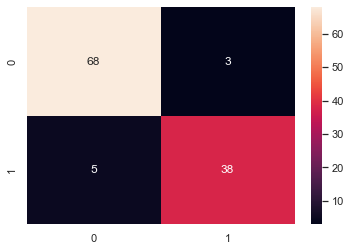

In [ ]:
#k-nearest neighbors binary classification on X_train and y_train
n_neighbors=3
binary_knn = KNeighborsClassifier(n_neighbors)
binary_knn.fit(X_train, y_train)

#Prediction on X_test
y_pred_bi = binary_knn.predict(X_test)

#Accuracy: use accuracy_score 
knn_accuracy = accuracy_score(y_test,y_pred_bi)

#F1 score: use f1_score with average='binary' 
knn_f1 = f1_score(y_test,y_pred_bi, average='binary')

print('K-nearest Neighbors Accuracy: {:.5f}'.format(knn_accuracy))
print('K-nearest Neighbors F1-Score: {:.5f}'.format(knn_f1))
print('K-nearest Neighbors Confusion Matrix: ')
cm = confusion_matrix(y_test,y_pred_bi)
sns.heatmap(cm,annot=True,fmt="d")

### Suppot Vector Machine

SVM Accuracy: 0.92982
SVM F1-Score: 0.89744
Micro F1-Score: 0.92982
Macro F1-Score: 0.92205
Cross-Validation SVM Accuracy: 0.92982
Cross-Validation Micro F1-Score: 0.92982
Cross-Validation Macro F1-Score: 0.92205
SVM Confusion Matrix: 


C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

<AxesSubplot:>

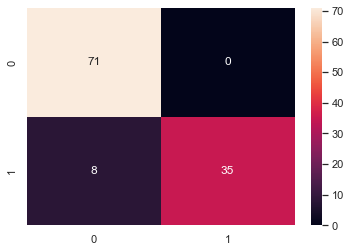

In [ ]:
#Support vector machine binary classification on X_train and y_train
binary_svm = SVC(kernel='poly',random_state=42)
binary_svm.fit(X_train,y_train)

#Prediction on X_test
y_pred_bi = binary_svm.predict(X_test)
#Accuracy: use accuracy_score 
svm_accuracy = accuracy_score(y_test, y_pred_bi)

#F1 score: use f1_score with average='binary' 
svm_f1 = f1_score(y_test,y_pred_bi, average='binary')
#Micro F1 score: use f1_score with average='micro' 
svm_microf1 = f1_score(y_test,y_pred_bi, average='micro')
#Micro F1 score: use f1_score with average='macro' 
svm_macrof1 = f1_score(y_test,y_pred_bi, average='macro')

#Cross validation evaluation
cv_results = cross_validate(binary_reg, X, cancer_labels, cv=5, scoring=("accuracy","f1_micro","f1_macro"))
#Accuracy: use mean() on cv_results['test_accuracy'] 
cv_reg_accuracy = mean(cv_results['test_accuracy'])
#Micro F1 score: use mean() on cv_results['test_f1_micro']
cv_svm_microf1 = mean(cv_results['test_f1_micro'])
#Micro F1 score: use mean() on cv_results['test_f1_macro']
cv_svm_macrof1 = mean(cv_results['test_f1_macro'])

print('SVM Accuracy: {:.5f}'.format(svm_accuracy))
print('SVM F1-Score: {:.5f}'.format(svm_f1))
print('Micro F1-Score: {:.5f}'.format(svm_microf1))
print('Macro F1-Score: {:.5f}'.format(svm_macrof1))
print('Cross-Validation Accuracy: {:.5f}'.format(svm_accuracy))
print('Cross-Validation Micro F1: {:.5f}'.format(svm_microf1))
print('Cross-Validation Macro F1: {:.5f}'.format(svm_macrof1))
print('SVM Confusion Matrix: ')
cm = confusion_matrix(y_test,y_pred_bi)
sns.heatmap(cm,annot=True,fmt="d")

Random Forest

Random Forest Accuracy: 0.98246
Random Forest Confusion Matrix: 


C:\Users\sluss\AppData\Local\Temp\ipykernel_483016\3398734494.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X_train,y_train)


<AxesSubplot:>

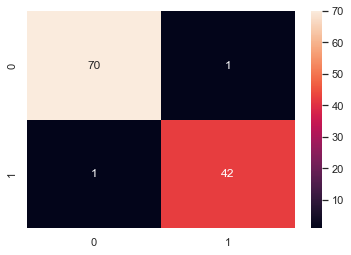

In [ ]:
# random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=42)      
clr_rf = clf_rf.fit(X_train,y_train)

# Prediction on X_test
y_pred = clf_rf.predict(X_test)
# Accuracy: use accuracy_score 
rf_accuracy = accuracy_score(y_test, y_pred)
rf_f1score = f1_score()

# Print results
print('Random Forest Accuracy: {:.5f}'.format(rf_accuracy))
print('Random Forest Confusion Matrix: ')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is around 98% and as it can be seen in confusion matrix, we made only two wrong predictions. Which is very good but has me afraid of overfitting